<a href="https://colab.research.google.com/github/MUbarak123-56/emotion-detection/blob/master/models/resnet_50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
#hide
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 719 kB 4.9 MB/s 
     |████████████████████████████████| 441 kB 66.7 MB/s 
     |████████████████████████████████| 5.3 MB 65.9 MB/s 
     |████████████████████████████████| 1.3 MB 68.3 MB/s 
     |████████████████████████████████| 1.6 MB 66.0 MB/s 
     |████████████████████████████████| 212 kB 78.2 MB/s 
     |████████████████████████████████| 163 kB 77.0 MB/s 
     |████████████████████████████████| 115 kB 70.6 MB/s 
     |████████████████████████████████| 127 kB 80.8 MB/s 
     |████████████████████████████████| 115 kB 77.0 MB/s 
     |████████████████████████████████| 7.6 MB 63.9 MB/s 
Mounted at /content/gdrive


In [3]:
#hide
from fastbook import *
from fastai.vision.widgets import *

In [4]:
path = Path('/content/gdrive/MyDrive/GitHub/emotion-detection/data/train')

In [5]:
pic=DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    get_y=parent_label,
    item_tfms=Resize(460),
    batch_tfms=aug_transforms(size=224))

In [6]:
dls = pic.dataloaders(path)

In [7]:
train_ds = dls.train_ds.items[:-1]
val_ds = dls.valid_ds.items[:-1]

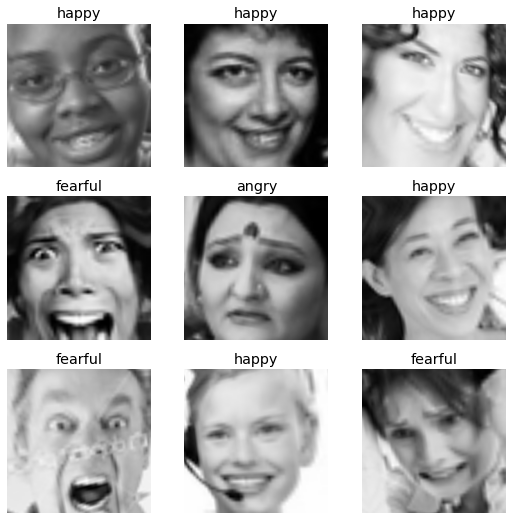

In [8]:
dls.show_batch()

In [9]:
#learn = cnn_learner(dls, models.resnet50, metrics=error_rate)

### Inferencing

In [10]:
test_path = Path('/content/gdrive/MyDrive/GitHub/emotion-detection/data/test')
test_path

Path('/content/gdrive/MyDrive/GitHub/emotion-detection/data/test')

In [11]:
test_img = Path('/content/gdrive/MyDrive/GitHub/emotion-detection/data/test/angry/im23.png')

In [12]:
model = load_learner("resnet-50.pkl")

In [13]:
model.predict(test_img)

('angry',
 TensorBase(0),
 TensorBase([9.3255e-01, 6.0586e-02, 4.2606e-03, 8.9828e-05, 1.0891e-03, 1.4260e-03]))

In [14]:
def inference(emotion, image):
  test_img = Path('/content/gdrive/MyDrive/GitHub/emotion-detection/data/test/' +emotion + "/" +image)
  return model.predict(test_img)

In [15]:
inference("surprised","im42.png")

('surprised',
 TensorBase(5),
 TensorBase([0.0277, 0.0178, 0.0076, 0.0610, 0.0042, 0.8817]))

In [16]:
inference("happy","im666.png")

('happy',
 TensorBase(2),
 TensorBase([5.5545e-04, 1.4280e-02, 9.3675e-01, 8.3758e-03, 6.4779e-03, 3.3556e-02]))

In [18]:
inference("happy","im420.png")

('happy',
 TensorBase(2),
 TensorBase([0.1432, 0.0840, 0.6112, 0.0943, 0.0561, 0.0111]))

In [21]:
inference("angry","im69.png")

('angry',
 TensorBase(0),
 TensorBase([0.8254, 0.0730, 0.0115, 0.0130, 0.0644, 0.0128]))